In [20]:
#Namibia pypsa-earth results

In [ ]:
#Initialize pypsa and matplotlib package

In [82]:
import pypsa
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from datetime import datetime
from cartopy import crs as ccrs
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches
plt.style.use("bmh")
%matplotlib inline

In [83]:
#load network with 32 nodes, 1h timestep

In [95]:
n= pypsa.Network("networks/elec.nc")

INFO:pypsa.io:Imported network elec.nc has buses, carriers, generators, lines, links, loads, transformers


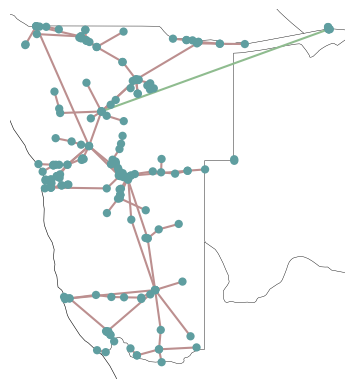

In [96]:
n.plot();

In [122]:
regions_onshore = gpd.read_file("shapes/country_shapes.geojson")

In [126]:
bus_scale = 2e3
line_scale = 1e3

/home/raj08555/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/plot.py:259: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, ratio in ratios.iteritems():


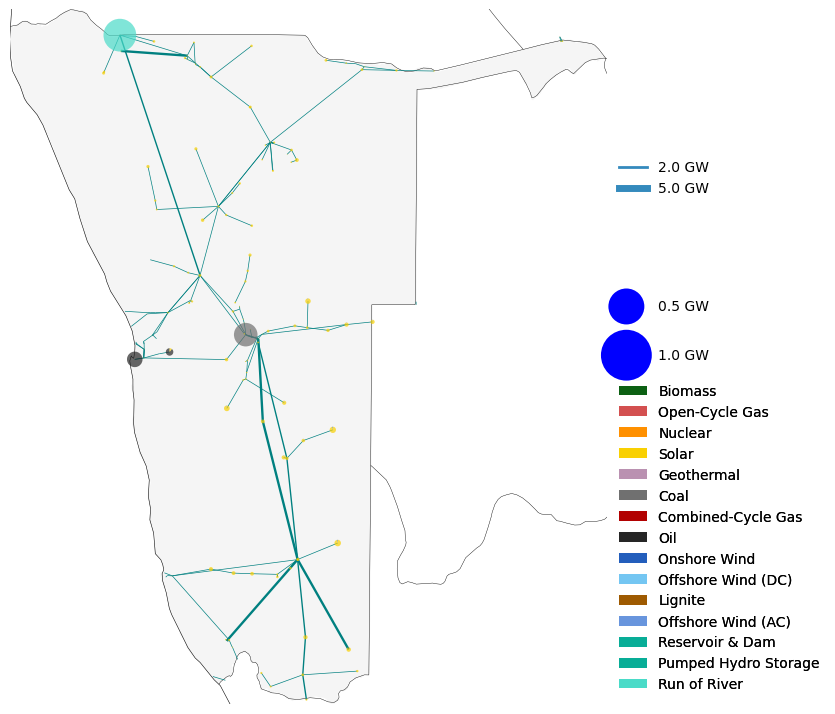

In [130]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": ccrs.EqualEarth(n.buses.x.mean())})
gen = n.generators.groupby(["bus", "carrier"]).p_nom.sum()
sto = n.storage_units.groupby(["bus", "carrier"]).p_nom.sum()
buses = pd.concat([gen, sto])

with plt.rc_context({"patch.linewidth": 0.}):
    n.plot(
        bus_sizes=buses / bus_scale,
        bus_alpha=0.7,
        line_widths=n.lines.s_nom / line_scale,
        link_widths=n.links.p_nom / line_scale,
        line_colors="teal",
        ax=ax,
        margin=0.2,
        color_geomap=None,
    )
regions_onshore.plot(
    ax=ax,
    facecolor="whitesmoke",
    edgecolor="white",
    aspect="equal",
    transform=ccrs.PlateCarree(),
    linewidth=0,
)
ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
legend_kwargs = {"loc": "upper left", "frameon": False}

# circles legend may requite some fine-tuning
legend_circles_dict = {"bbox_to_anchor": (1, 0.6), "labelspacing": 2.5, **legend_kwargs}
bus_sizes = [500, 10e2]  # in MW
line_sizes = [2000, 5000]  # in MW
add_legend_circles(
    ax,
    [s / bus_scale  for s in bus_sizes],
    [f"{s / 1000} GW" for s in bus_sizes],
    legend_kw=legend_circles_dict,    
)
add_legend_lines(
    ax,
    [s / line_scale for s in line_sizes],
    [f"{s / 1000} GW" for s in line_sizes],
    legend_kw={"bbox_to_anchor": (1, 0.8), **legend_kwargs},
)
add_legend_patches(
    ax,
    n.carriers.color,
    n.carriers.nice_name,
    legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc":"lower left"},
)
fig.tight_layout()
fig.savefig("brownfield_capacities_" + "na" + ".png", bbox_inches="tight", dpi=300)